Perceptron Training
####################
________________
Input : 0 , 0
Weights : 0.6 , 0.6
Summation : -1.0
Actual output : 0 Predicted Output 0
---------------
Input : 0 , 1
Weights : 0.6 , 0.6
Summation : -0.4
Actual output : 1 Predicted Output 0
.........
Updating Weights
Updated Weights:  0.6,1.1

Weights Updated Training Again : 
##################################
---------------
Input : 0 , 0
Weights : 0.6 , 1.1
Summation : -1.0
Actual output : 0 Predicted Output 0
---------------
Input : 0 , 1
Weights : 0.6 , 1.1
Summation : 0.10000000000000009
Actual output : 1 Predicted Output 1
---------------
Input : 1 , 0
Weights : 0.6 , 1.1
Summation : -0.4
Actual output : 1 Predicted Output 0
.........
Updating Weights
Updated Weights:  1.1,1.1

Weights Updated Training Again : 
##################################
---------------
Input : 0 , 0
Weights : 1.1 , 1.1
Summation : -1.0
Actual output : 0 Predicted Output 0
---------------
Input : 0 , 1
Weights : 1.1 , 1.1
Summation : 0.100000000

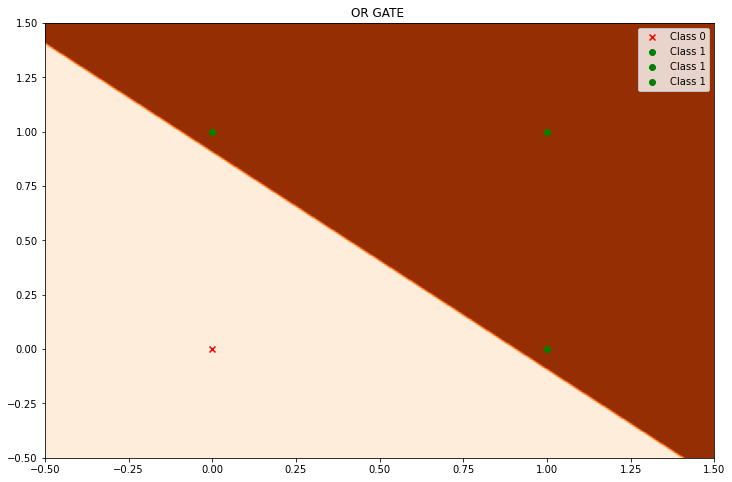

OR Gate Output for [1, 1] : 1


In [7]:
import numpy as np
def activation(out, threshold):
    act_out = 1/(1 + np.exp(-out))
    if act_out>=threshold:
        return 1
    else:
        return 0
def perceptron(and_input):
    a = [0, 0, 1, 1]
    b = [0, 1, 0, 1]
    y = [0, 1, 1, 1]
    bias = -1
    w = [0.6,0.6,1]
    threshold = 0.5
    learning_rate = 0.5
    i = 0
    print("Perceptron Training")
    print("####################")
    print("________________")
    while i<4:
        summation = (a[i]*w[0] + b[i]*w[1]) + bias*w[2]
        target_output = activation(summation, threshold)
        print("Input : " + str(a[i]) + " , "+str(b[i]))
        print("Weights : " + str(w[0]) + " , "+str(w[1]))
        print("Summation : " + str(summation))
        print("Actual output : " + str(y[i]) + " Predicted Output "+str(target_output))
        if(target_output != y[i]):
            print(".........\nUpdating Weights")
            w[0] = w[0] + learning_rate*(y[i] - target_output)*a[i]
            w[1] = w[1] + learning_rate*(y[i] - target_output)*b[i]
            print("Updated Weights: ", str(w[0]) + ','+str(w[1]))
            i = -1
            print("\nWeights Updated Training Again : ")
            print("##################################")
        i = i+1
        print("---------------")
    summation = and_input[0]*w[0] + and_input[1]*w[1] + bias*w[2]
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 8))
    x_min, x_max = -0.5,1.5
    y_min, y_max = -0.5,1.5
    xx,yy = np.meshgrid(np.linspace(x_min, x_max,100),np.linspace(y_min, y_max,100))
    
    Z = np.array([activation((np.dot([w[0],w[1]], [a, b]) + bias*w[2]), threshold) for a, b in np.c_[xx.ravel(), yy.ravel()]])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='Oranges')
    for i in range(len(y)):
        if y[i] == 0:
            plt.scatter(a[i], b[i], color='red', marker='x', label='Class 0')
        else:
            plt.scatter(a[i], b[i], color='green', marker='o', label='Class 1')

    #plt.scatter(a,b, c=y, cmap = "Blues_r", label = "a & b values")
    plt.title("OR GATE ")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    #plt.xticks(())
    #plt.yticks(())
    #plt.grid()
    plt.legend()
    plt.show()
    return activation(summation, threshold)

and_input = [1,1]
print("OR Gate Output for "+ str(and_input) + " : " + str(perceptron(and_input)))